# Covid-19 Analysis #

***
This notebook contains my analysis of the Covid-19 vaccination program.

# Overview of the COVID-19 Vaccination Datasets

## [Weekly vaccination dataset information](https://covid19ireland-geohive.hub.arcgis.com/datasets/0101ed10351e42968535bb002f94c8c6_0/about)

This dataset provides comprehensive details on COVID-19 vaccination efforts, capturing key metrics across temporal, demographic, and vaccination-specific categories. The data is structured as follows:

## **Temporal Details & Geographical Details**
- **Extract Date:** The date on which the dataset was extracted, enabling time-based tracking of updates.
- **Vaccination Date:** The specific dates vaccinations occurred, facilitating analysis of daily trends.
- **Week:** Epidemiological week classification for standardized reporting, referencing [HPSC Epidemiological Weeks](https://www.hpsc.ie/notifiablediseases/resources/epidemiologicalweeks/).
- **Latitude and Longitude:** Geographic coordinates associated with the vaccination data.

## **Vaccination Totals**
- **Total Daily Vaccines:** Total number of vaccines administered daily.

## **Demographics**
- **Gender:** Data on the number of vaccines administered, categorized as Male, Female, or Not Assigned (NA).
- **Age Group:** Vaccination data is broken into specific age cohorts for detailed demographic analysis:
  - Partial Vaccination (at least one dose) and Full Vaccination (complete dose series) metrics are provided for age cohorts spanning from 0–9 to 80+ years.
  - Data includes both daily and cumulative counts, as well as percentages representing vaccination coverage within each cohort.

## **Dose Information**
- **Dose 1, Dose 2, and Single Dose:** Counts for each type of vaccination administered based on the dose type.
- **Fully Vaccinated:** Includes data on individuals completing the vaccination regimen (e.g., Dose 2 for mRNA or AstraZeneca vaccines, or a single-dose Janssen vaccine).

## **Vaccine Brand**
- Details vaccinations administered by brand, including Moderna, Pfizer, Janssen, and AstraZeneca.

## **Age Group Cumulative Data**
- **Cumulative Counts:** Tracks cumulative totals for partial and fully vaccinated individuals in each age group over time.
- **Cumulative Percentages:** Proportions of partial and fully vaccinated individuals relative to the population of each age cohort.

---

## **Key Metrics Summary**
This dataset provides granular insights into vaccination progress, enabling the evaluation of:
- Daily and cumulative vaccination rates.
- Vaccination coverage across age groups and genders.
- The impact of different vaccine brands.
- Trends over time and geographical distribution using temporal and spatial fields.

This structure supports public health monitoring, epidemiological research, and vaccination campaign evaluation.

## [Weekly Booster Vaccination Dataset](https://covid-19.geohive.ie/datasets/edcdb71467244bae90190d54fd665c74_0/about)

This dataset provides detailed insights into the administration of COVID-19 booster vaccines, categorized by temporal, demographic, dose-specific, and vaccine-specific attributes. The data structure is outlined as follows:

## **Temporal and Geographical Details**
- **Extract Date:** The date on which the data was extracted for analysis.
- **Date:** Specific dates associated with booster administration records.
- **Week and EpiWeek:** Epidemiological week identifiers for standard reporting and temporal trend analysis.
- **Latitude and Longitude:** Geographic coordinates linked to the vaccination data.

## **Booster Vaccination Totals**
- **Weekly Booster Vaccines:** Total number of booster doses administered each week.

## **Demographics**
- **Gender:** Booster vaccine data categorized by gender:
  - **Female, Male, Not Assigned (NA):** Counts of administered boosters for each gender category.

- **Age Groups:** Booster doses administered across age cohorts:
  - **Additional Doses (Age 5–11 to 80+):** Weekly and cumulative data for additional doses.
  - **Immunocompromised Doses (Age 5–11 to 80+):** Weekly and cumulative data for doses administered to immunocompromised individuals.
  - **Additional Dose 2, 3, and 4 (Age 5–11 to 80+):** Weekly and cumulative data for subsequent booster doses (2nd, 3rd, and 4th) in these age cohorts.
  - **Percentages by Age Group:** Coverage rates (% of population) for each age cohort and booster dose.

## **Booster Brand**
- Details boosters administered by brand, including Moderna, Pfizer, Janssen, and AstraZeneca.

## **Cumulative and Percentage Metrics**
- **Cumulative Totals:** Tracks the total number of doses administered up to a given date.
- **Population Coverage:** Percentages representing the share of the population receiving booster doses, broken down by:
  - Dose type (e.g., additional doses, subsequent doses).
  - Age group (e.g., 5–11, 12–19, etc.).
  - Vaccine brand.

---

## **Key Metrics Summary**
This dataset enables in-depth analysis of:
- Weekly trends in booster administration.
- Demographic disparities in vaccine distribution by age and gender.
- Brand-specific booster uptake.
- Booster coverage rates across multiple dose types and age cohorts.
- Targeted analysis of immunocompromised populations and additional dose recipients.


In [174]:
# Load the weekly vaccinations dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('covid_weekly_vaccine.csv') # https://covid19ireland-geohive.hub.arcgis.com/datasets/0101ed10351e42968535bb002f94c8c6_0/explore?location=53.510274%2C-7.920586%2C7.88

# Let's have a look at the data
df.head()

,X,Y,ExtractDate,Week,TotalweeklyVaccines,Male,Female,NA,Moderna,Pfizer,...,FullyPer_Age10to19,FullyPer_Age20to29,FullyPer_Age30to39,FullyPer_Age40to49,FullyPer_Age50to59,FullyPer_Age60to69,FullyPer_Age70to79,FullyPer_80_,FullyPer_NA,ObjectId
0,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2020-W53,4076,1304,2772,0,10,4052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W01,44220,11846,32374,0,28,44148,...,0.000004,0.000018,0.000042,0.000011,0.000011,0.000010,0.000009,0.000049,NaN,2
2,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W02,53145,14057,39088,0,1946,51118,...,0.000004,0.000032,0.000079,0.000023,0.000020,0.000018,0.000014,0.000060,NaN,3
3,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W03,50222,14964,35258,0,51,50000,...,0.000004,0.000669,0.001511,0.001108,0.001237,0.000756,0.000086,0.000125,NaN,4
4,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W04,51949,15066,36883,0,35,51652,...,0.000007,0.007608,0.015900,0.015613,0.017585,0.011731,0.001500,0.004408,inf,5


In [175]:
# Check for missing data in the dataframe
missing_data = df.isnull().sum()

# Drop rows with missing data, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
df_cleaned = df.fillna(0)

# Print the count of missing data per column
print("Missing data per column:")
print(missing_data)

# Display the cleaned dataframe (first few rows)
print("\nCleaned DataFrame:")
print(df_cleaned.head())

Missing data per column:
X                      0
Y                      0
ExtractDate            0
Week                   0
TotalweeklyVaccines    0
                      ..
FullyPer_Age60to69     1
FullyPer_Age70to79     1
FullyPer_80_           1
FullyPer_NA            4
ObjectId               0
Length: 73, dtype: int64

Cleaned DataFrame:
               X             Y             ExtractDate      Week  \
0 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2020-W53   
1 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W01   
2 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W02   
3 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W03   
4 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W04   

   TotalweeklyVaccines   Male  Female  NA  Moderna  Pfizer  ...  \
0                 4076   1304    2772   0       10    4052  ...   
1                44220  11846   32374   0       28   44148  ...   
2                53145  14057   39088   0    

In [176]:
# general stats of the dataset
df_cleaned.describe()

c:\Users\jaked\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\jaked\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,X,Y,TotalweeklyVaccines,Male,Female,NA,Moderna,Pfizer,Janssen,AstraZeneca,...,FullyPer_Age10to19,FullyPer_Age20to29,FullyPer_Age30to39,FullyPer_Age40to49,FullyPer_Age50to59,FullyPer_Age60to69,FullyPer_Age70to79,FullyPer_80_,FullyPer_NA,ObjectId
count,1.750000e+02,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.0,175.000000
mean,-8.563363e+05,7.036492e+06,45348.400000,22207.165714,23138.622857,2.611429,3326.942857,33666.582857,1379.480000,6972.600000,...,0.482507,0.728759,0.711257,0.759646,0.863424,0.862889,0.890087,0.929151,inf,88.000000
std,7.004962e-10,1.681191e-08,94957.153016,48265.275074,46968.975986,7.477774,9642.127109,66372.912658,6269.788687,21904.561913,...,0.251247,0.314536,0.293545,0.300658,0.317705,0.325862,0.295362,0.243732,NaN,50.662281
min,-8.563363e+05,7.036492e+06,3.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,-8.563363e+05,7.036492e+06,82.500000,43.500000,41.000000,0.000000,0.000000,81.500000,0.000000,0.000000,...,0.454230,0.841064,0.819441,0.878314,0.987103,1.000000,1.000000,1.000000,NaN,44.500000
50%,-8.563363e+05,7.036492e+06,693.000000,372.000000,320.000000,0.000000,8.000000,675.000000,1.000000,2.000000,...,0.636538,0.887325,0.855433,0.897921,0.997308,1.000000,1.000000,1.000000,NaN,88.000000
75%,-8.563363e+05,7.036492e+06,27940.000000,12003.000000,13742.000000,1.000000,91.000000,24231.000000,9.500000,81.000000,...,0.638983,0.888784,0.856572,0.898467,0.997617,1.000000,1.000000,1.000000,NaN,131.500000
max,-8.563363e+05,7.036492e+06,395534.000000,206759.000000,188760.000000,54.000000,53976.000000,267610.000000,49514.000000,122005.000000,...,0.639036,0.888881,0.856651,0.898504,0.997661,1.000000,1.000000,1.000000,inf,175.000000


In [177]:
# Convert the 'week' column to a proper date (first day of the ISO week), https://stackoverflow.com/questions/17087314/get-date-from-week-number
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Week'] + '-1', format='%G-W%V-%u')

# Check the first few rows
df_cleaned[['Week', 'Date']].head()

,Week,Date
0,2020-W53,2020-12-28
1,2021-W01,2021-01-04
2,2021-W02,2021-01-11
3,2021-W03,2021-01-18
4,2021-W04,2021-01-25


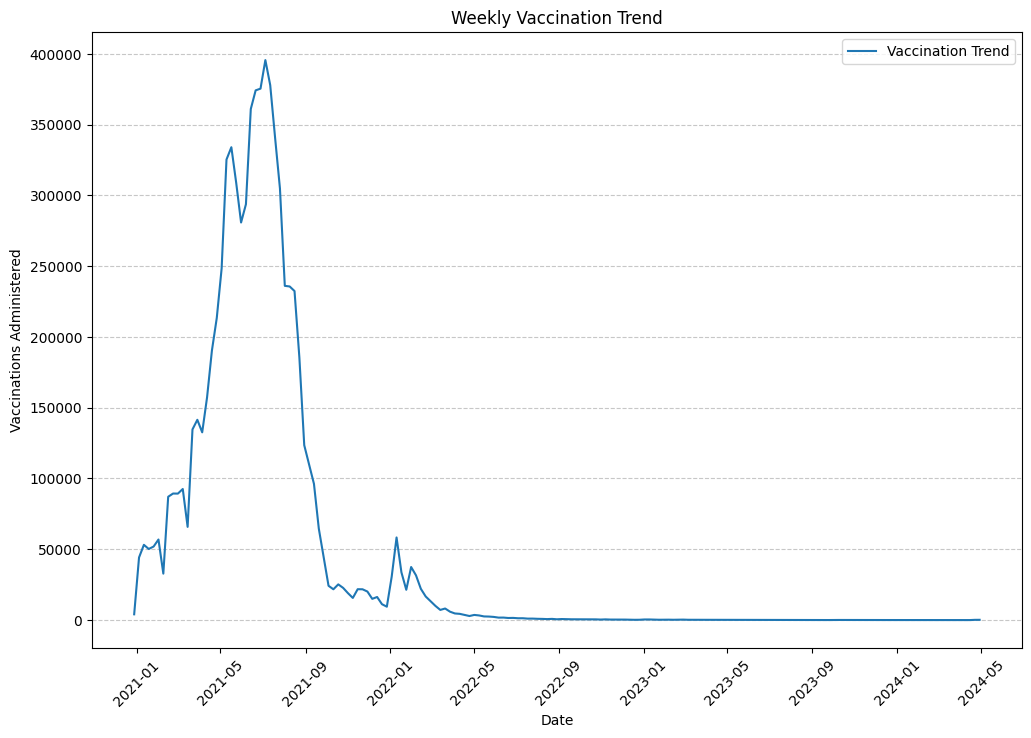

In [178]:
# Assuming the vaccination count column is named 'Vaccination_Count' (replace if necessary)
plt.figure(figsize=(12, 8))
plt.plot(df_cleaned['Date'], df_cleaned['TotalweeklyVaccines'], label='Vaccination Trend')
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [179]:
# Convert the ISO week to the first day of that week (Monday)
end_date = pd.to_datetime('2022-W26-1', format='%G-W%V-%u')  # The first day of '2022-W26'

print(end_date)

2022-06-27 00:00:00


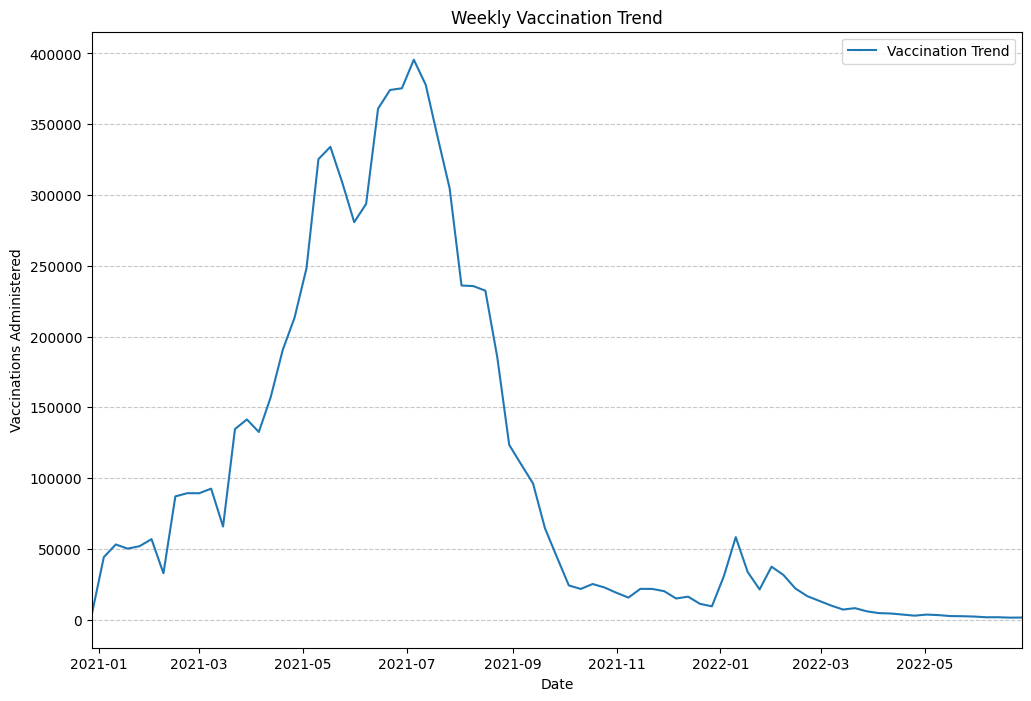

In [180]:
# Plot vaccination trend
plt.figure(figsize=(12, 8))
plt.plot(df_cleaned['Date'], df_cleaned['TotalweeklyVaccines'], label='Vaccination Trend')

# Set x-axis limits (start from the first date in the data to '2022-W26')
plt.xlim(df_cleaned['Date'].min(), end_date)

# Add labels and title
plt.xlabel('Date')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend')

# Display legend
plt.legend()

# Show plot
plt.show()

## Weekly Vaccination Trend

- **Start of Rollout:** Vaccination rollout began early 2021.  
- **Initial Growth:** Steady increase in vaccination rates, peaking by late July to early August 2021.  
  - **Peak Rate:** Nearly 40,000 vaccinations per week during this period.  
- **Decline:** Gradual decline in vaccination rates after the initial peak.  
- **Second Peak:** Early 2022 saw a small resurgence.  
  - **Rate:** Weekly vaccinations peaked at nearly 6,000.

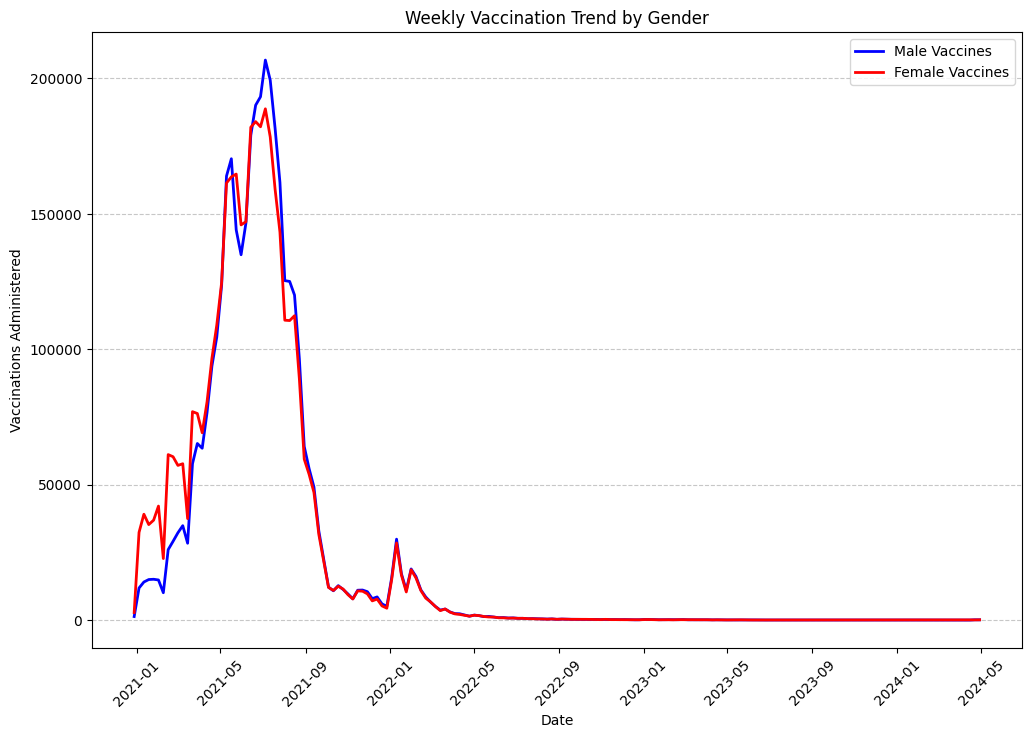

In [181]:

plt.figure(figsize=(12, 8))

# Plot male vaccination trend
plt.plot(df_cleaned['Date'], df_cleaned['Male'], label='Male Vaccines', color='blue', linestyle='-', linewidth=2)

# Plot female vaccination trend
plt.plot(df_cleaned['Date'], df_cleaned['Female'], label='Female Vaccines', color='red', linestyle='-', linewidth=2)

# Format x-axis to show dates better
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend by Gender')

# Show legend
plt.legend()

# Display the plot
plt.show()

## Trend by Gender

- **Start of Year:** Vaccination rates were higher among females.  
- **Mid-Year:** Male vaccination rates surpassed female rates.  
- **Remainder of Year:** Rates remained consistent between genders.  
- **Second Peak:** Gender vaccination rates stayed consistent during the resurgence. 

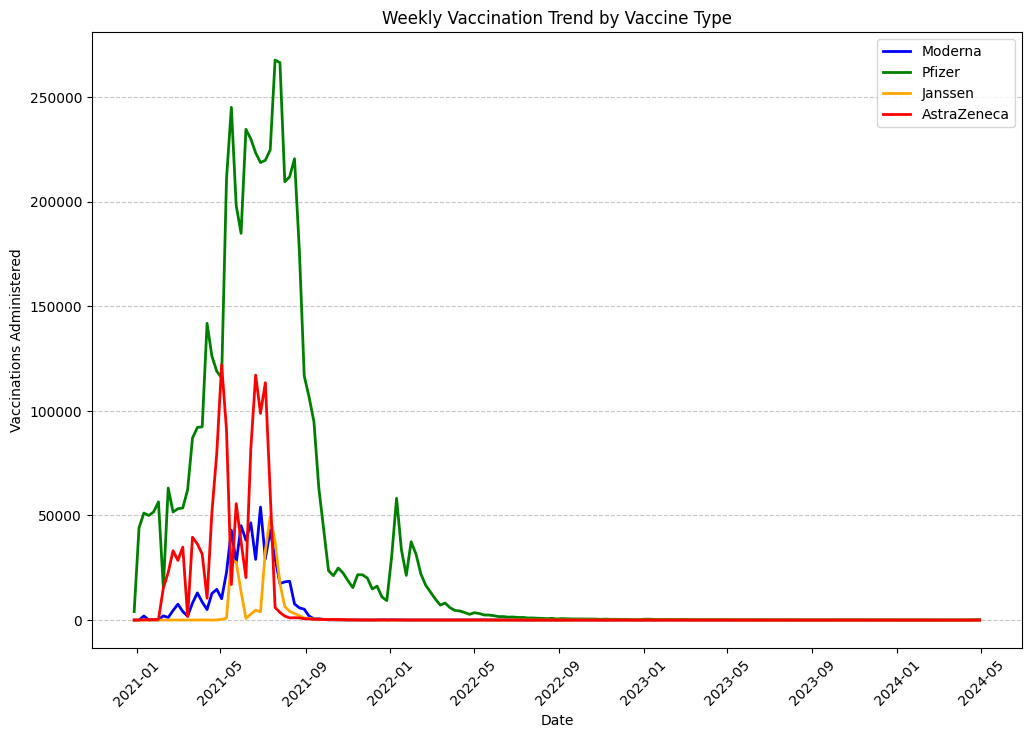

In [182]:
# Plotting the vaccination trend for different vaccine types
plt.figure(figsize=(12, 8))

# Plot Moderna vaccinations
plt.plot(df_cleaned['Date'], df_cleaned['Moderna'], label='Moderna', color='blue', linestyle='-', linewidth=2)

# Plot Pfizer vaccinations
plt.plot(df_cleaned['Date'], df_cleaned['Pfizer'], label='Pfizer', color='green', linestyle='-', linewidth=2)

# Plot Janssen vaccinations
plt.plot(df_cleaned['Date'], df_cleaned['Janssen'], label='Janssen', color='orange', linestyle='-', linewidth=2)

# Plot AstraZeneca vaccinations
plt.plot(df_cleaned['Date'], df_cleaned['AstraZeneca'], label='AstraZeneca', color='red', linestyle='-', linewidth=2)

# Format x-axis to show dates better
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend by Vaccine Type')

# Show legend
plt.legend()

# Display the plot
plt.show()

## Trend by Vaccine Type

- **Pfizer:** Most administered vaccine, peaking at ~270,000 weekly vaccinations. Pfizer vaccines was used almost exclusively during the second peak.
- **AstraZeneca:** Second most administered, peaking at ~120,000 weekly vaccinations.  
- **Moderna:** Weekly vaccinations peaked at just over 50,000.  
- **Janssen:** Weekly vaccinations peaked just under 50,000.  

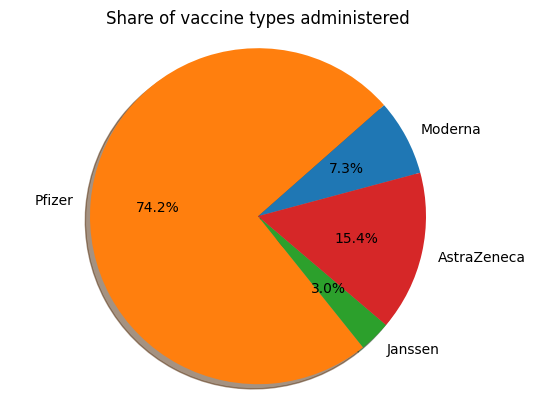

In [183]:
vaccine_type = [
    'Moderna', 'Pfizer', 'Janssen',
    'AstraZeneca'
]

total_vaccine_type = df_cleaned[vaccine_type].sum()

plt.pie(total_vaccine_type, labels= total_vaccine_type.index, autopct='%1.1f%%', startangle=15, shadow = True,)
plt.title('Share of vaccine types administered')
plt.axis('equal')
plt.show()


Partial_Age0to9       79207.0
Partial_Age10to19    362340.0
Partial_Age20to29    558006.0
Partial_Age30to39    596225.0
Partial_Age40to49    710341.0
Partial_Age50to59    636535.0
Partial_Age60to69    522056.0
Partial_Age70to79    395630.0
Partial_Age80_       251295.0
dtype: float64


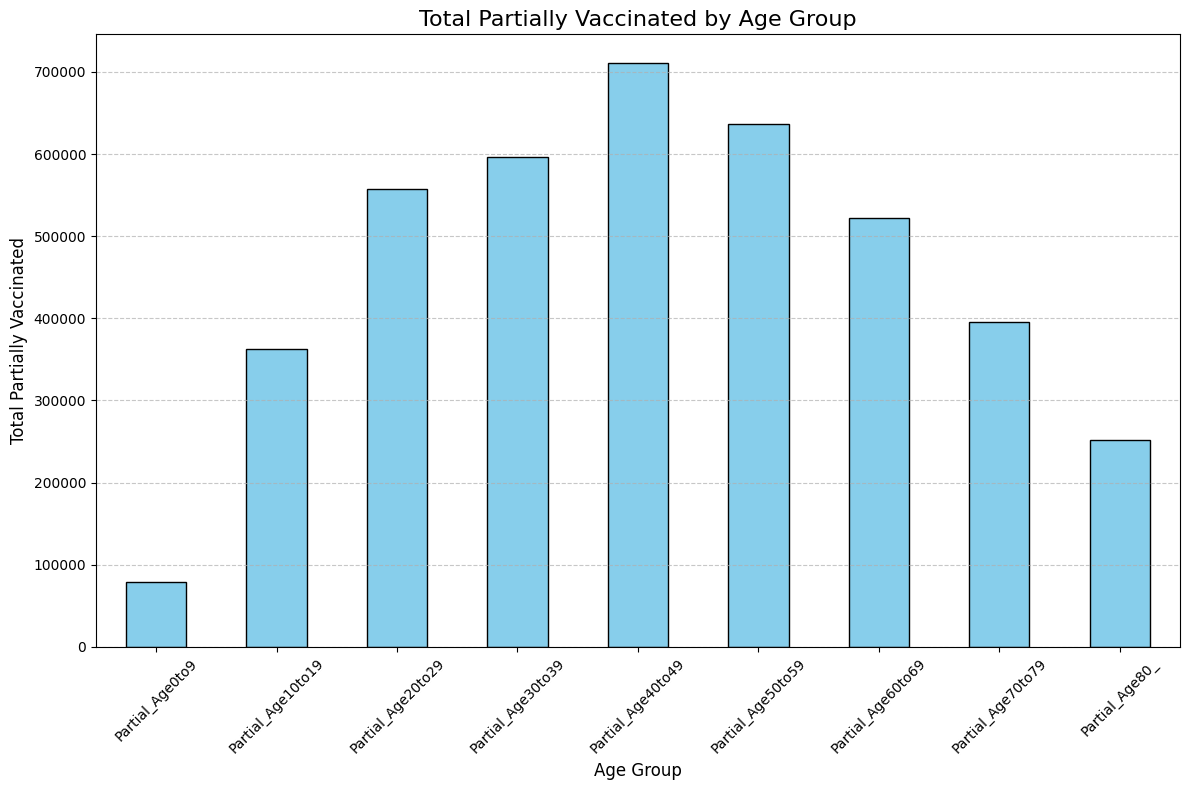

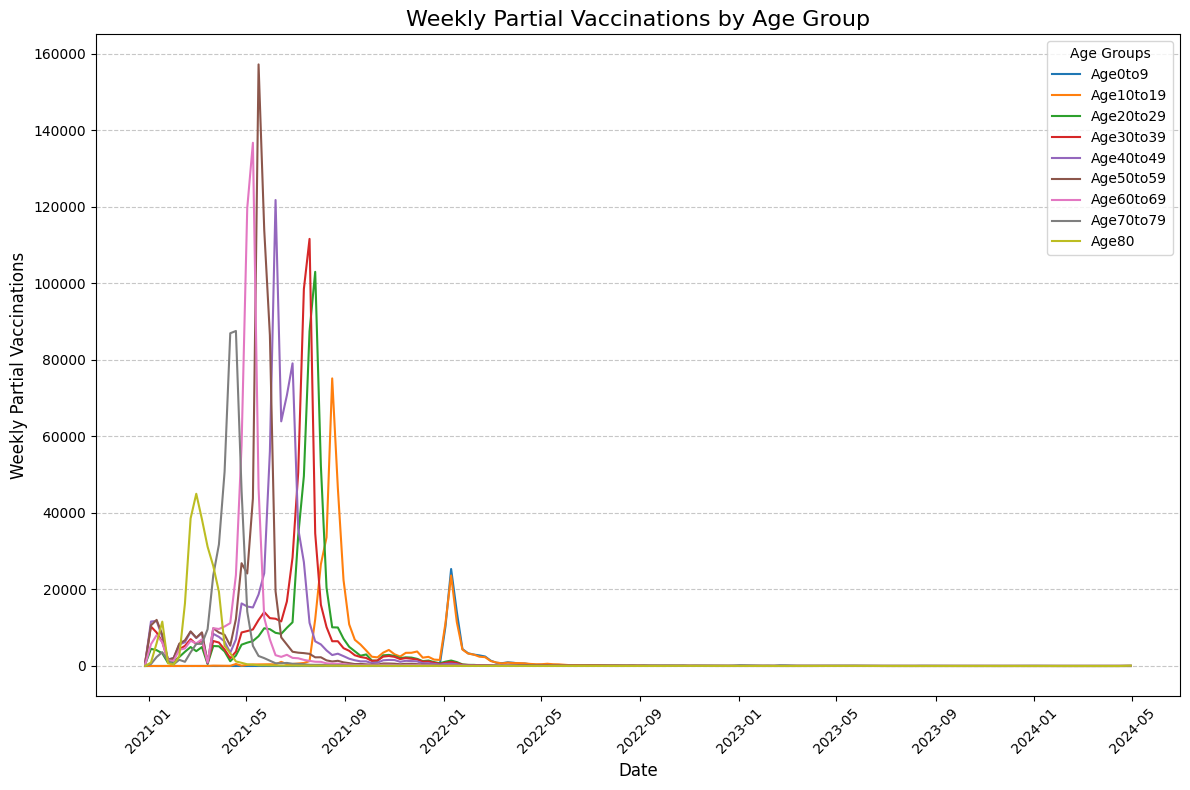

In [184]:
# Define the partial vaccination columns
partial_vaccinated_columns = [
    'Partial_Age0to9', 'Partial_Age10to19', 'Partial_Age20to29',
    'Partial_Age30to39', 'Partial_Age40to49', 'Partial_Age50to59',
    'Partial_Age60to69', 'Partial_Age70to79', 'Partial_Age80_'
]

# 1. Total partial vaccinations by age group
total_partial_vaccinated_by_age = df_cleaned[partial_vaccinated_columns].sum()

print(total_partial_vaccinated_by_age)

# Plot total partial vaccinations by age group (Bar Chart)
plt.figure(figsize=(12, 8))
total_partial_vaccinated_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Partially Vaccinated by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Partially Vaccinated', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Trends over time for partial vaccinations by age group (Line Chart)
plt.figure(figsize=(12, 8))
for column in partial_vaccinated_columns:  # <- Add missing colon here
    plt.plot(df_cleaned['Date'], df_cleaned[column], label=column.split('_')[1])

plt.title('Weekly Partial Vaccinations by Age Group', fontsize=16)  # Corrected title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Partial Vaccinations', fontsize=12)  # Corrected ylabel
plt.legend(title="Age Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##  Partial Vaccinations by age group.

- **Peak Group:** 40-49 age group has the highest partial vaccinations, showing strong uptake.  
- **Working-Age Success:** 30-59 age groups dominate partial vaccinations, reflecting effective targeting.  
- **Low Uptake in Children:** 0-9 age group has the fewest partial vaccinations, likely due to eligibility or hesitancy.  
- **Decline in Older Ages:** Partial vaccinations decrease after 50-59, possibly due to higher full vaccination rates.  
- **Older Age Priority:** Older age groups (60+) were prioritized for vaccination early on, which likely led to higher initial vaccination rates in these groups.  
- **Improvement Area:** 10-19 age group could benefit from focused outreach to increase uptake.  
- **Policy Impact:** High vaccination rates in 20-49 age groups support societal and economic activities.

Fully_Age0to9       73458.0
Fully_Age10to19    353212.0
Fully_Age20to29    549699.0
Fully_Age30to39    589031.0
Fully_Age40to49    704571.0
Fully_Age50to59    633728.0
Fully_Age60to69    519551.0
Fully_Age70to79    393663.0
Fully_Age80_       248658.0
dtype: float64


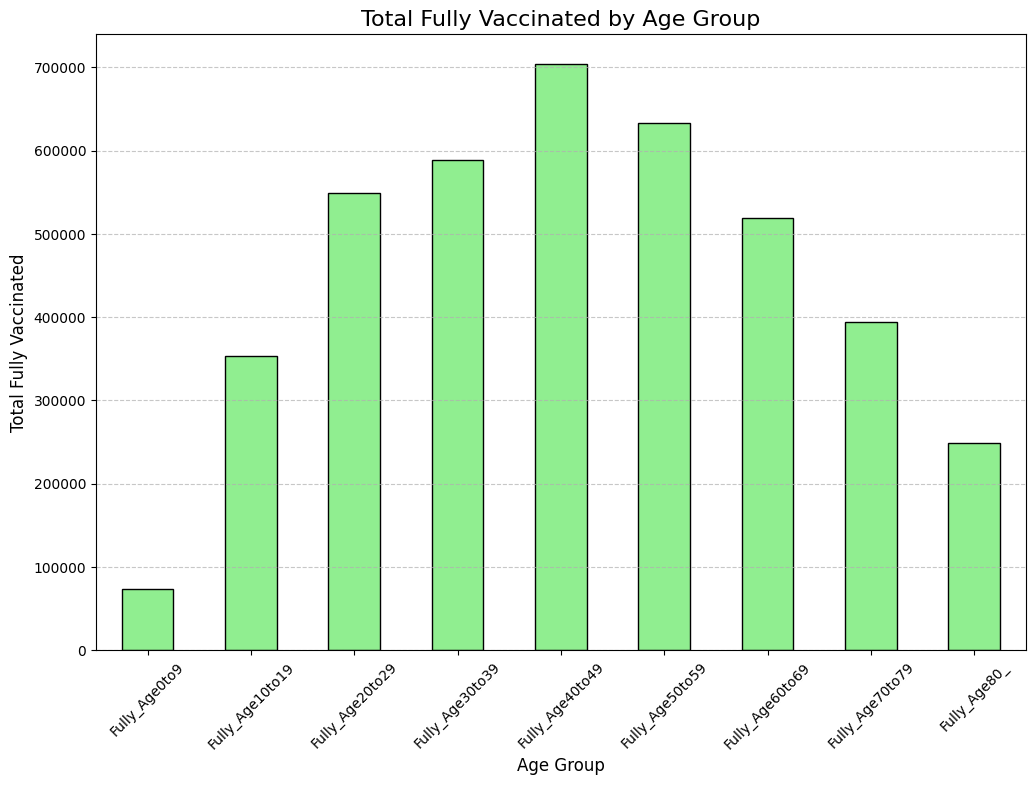

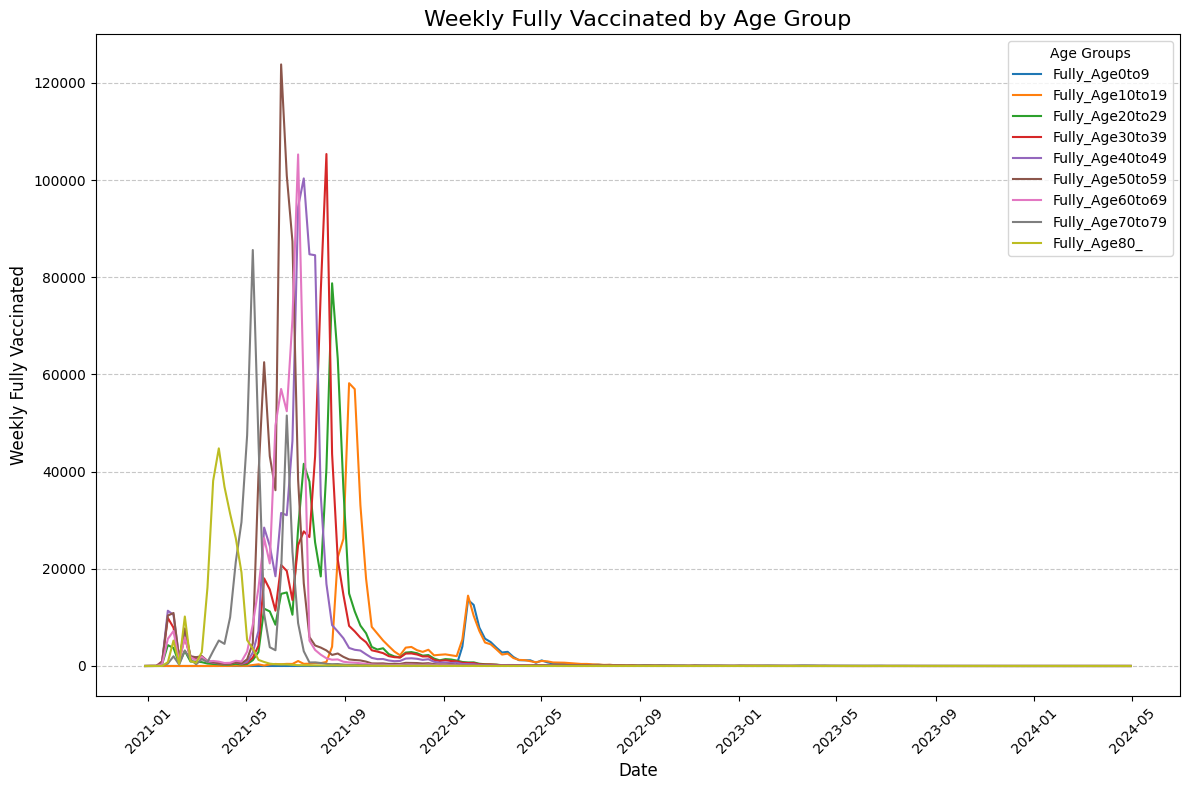

In [185]:
# Extract columns related to fully vaccinated age groups
fully_vaccinated_columns = [
    'Fully_Age0to9', 'Fully_Age10to19', 'Fully_Age20to29',
    'Fully_Age30to39', 'Fully_Age40to49', 'Fully_Age50to59',
    'Fully_Age60to69', 'Fully_Age70to79', 'Fully_Age80_'
]

# 1. Total fully vaccinated by age group
total_fully_vaccinated_by_age = df_cleaned[fully_vaccinated_columns].sum()

print(total_fully_vaccinated_by_age)

# Plot total fully vaccinated by age group
plt.figure(figsize=(12, 8))
total_fully_vaccinated_by_age.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Fully Vaccinated by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Fully Vaccinated', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Trends over time for fully vaccinated age groups
plt.figure(figsize=(12, 8))
for column in fully_vaccinated_columns:
    plt.plot(df_cleaned['Date'], df_cleaned[column], label=column)

plt.title('Weekly Fully Vaccinated by Age Group', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Fully Vaccinated', fontsize=12)
plt.legend(title="Age Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

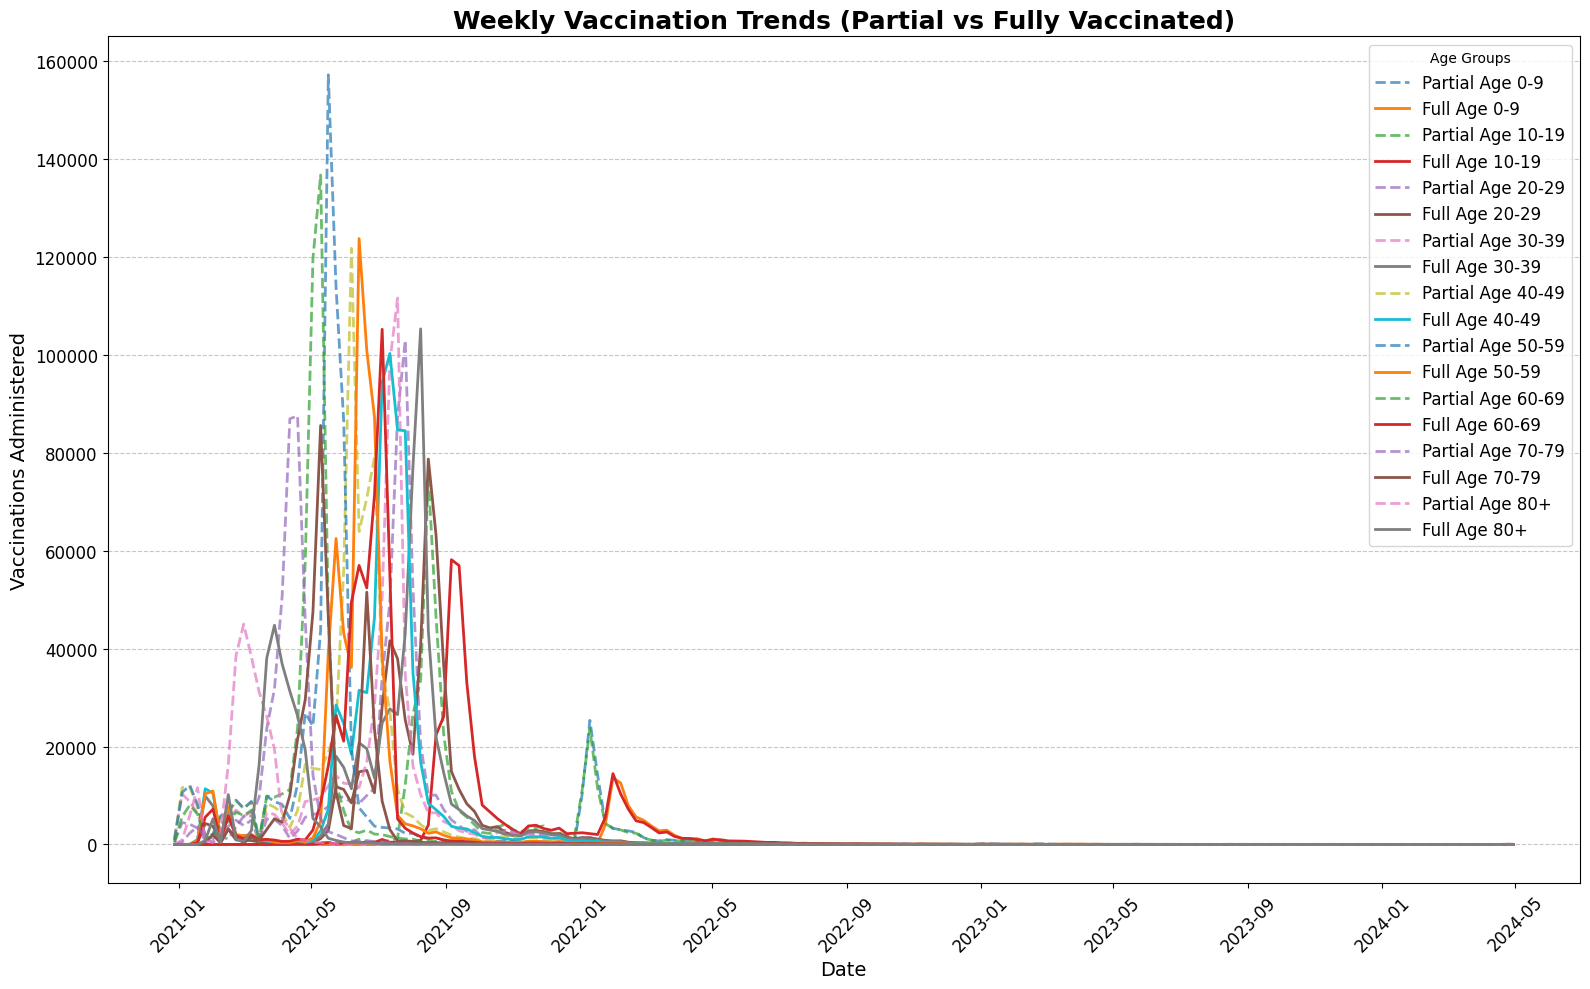

In [186]:
# Define columns for partial and full vaccinations
partial_vaccinated_columns = [
    'Partial_Age0to9', 'Partial_Age10to19', 'Partial_Age20to29',
    'Partial_Age30to39', 'Partial_Age40to49', 'Partial_Age50to59',
    'Partial_Age60to69', 'Partial_Age70to79', 'Partial_Age80_'
]

fully_vaccinated_columns = [
    'Fully_Age0to9', 'Fully_Age10to19', 'Fully_Age20to29',
    'Fully_Age30to39', 'Fully_Age40to49', 'Fully_Age50to59',
    'Fully_Age60to69', 'Fully_Age70to79', 'Fully_Age80_'
]

# Plot for each column manually for all age groups
plt.figure(figsize=(16, 10))  # Increase figure size for better clarity

# Set line styles and make the lines thicker for better visibility
line_style_partial = {'linestyle': '--', 'alpha': 0.7, 'linewidth': 2}
line_style_full = {'linewidth': 2}

# Indexing and selecting data, https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[0]], label="Partial Age 0-9", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[0]], label="Full Age 0-9", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[1]], label="Partial Age 10-19", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[1]], label="Full Age 10-19", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[2]], label="Partial Age 20-29", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[2]], label="Full Age 20-29", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[3]], label="Partial Age 30-39", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[3]], label="Full Age 30-39", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[4]], label="Partial Age 40-49", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[4]], label="Full Age 40-49", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[5]], label="Partial Age 50-59", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[5]], label="Full Age 50-59", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[6]], label="Partial Age 60-69", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[6]], label="Full Age 60-69", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[7]], label="Partial Age 70-79", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[7]], label="Full Age 70-79", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[8]], label="Partial Age 80+", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[8]], label="Full Age 80+", **line_style_full)

# Customize the plot appearance
plt.title("Weekly Vaccination Trends (Partial vs Fully Vaccinated)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Vaccinations Administered", fontsize=14)
plt.legend(title="Age Groups", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

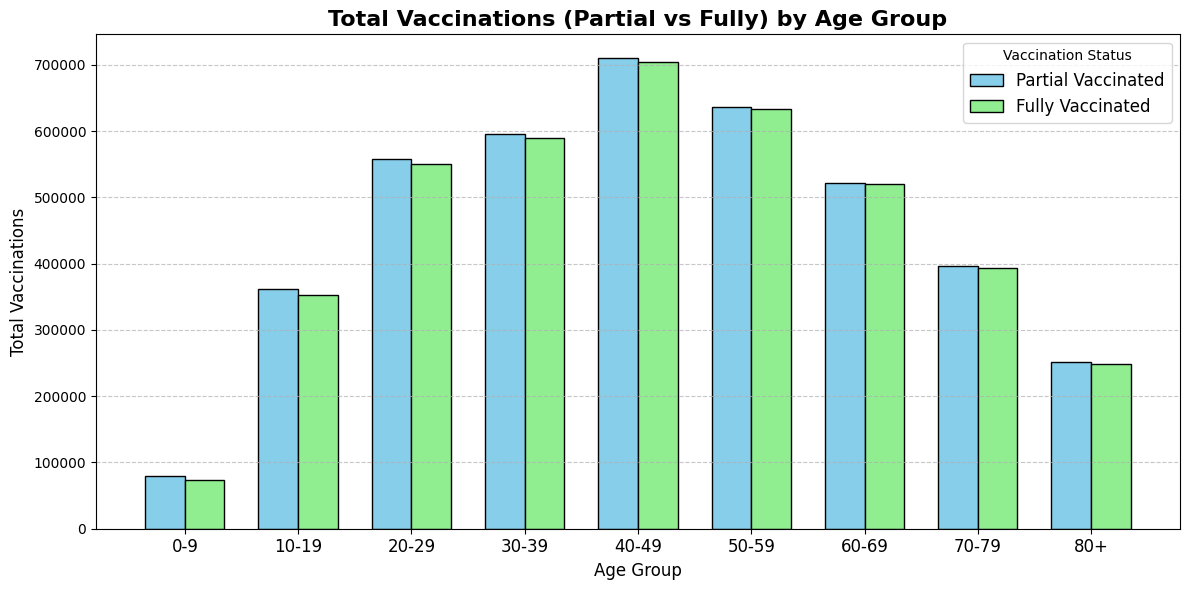

In [187]:
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']  


total_partial_vaccinated_by_age = [79207.0, 362340.0, 558006.0, 596225.0, 710341.0, 636535.0, 522056.0, 395630.0, 251295.0]
total_fully_vaccinated_by_age = [73458.0, 353212.0, 549699.0, 589031.0, 704571.0, 633728.0, 519551.0, 393663.0, 248658.0]

# Create the positions for each bar
bar_width = 0.35
index = np.arange(len(age_groups))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the partial vaccination bars (shifted to the left by half the bar width)
plt.bar(index - bar_width / 2, total_partial_vaccinated_by_age, bar_width, label='Partial Vaccinated', color='skyblue', edgecolor='black')

# Plot the fully vaccinated bars (shifted to the right by half the bar width)
plt.bar(index + bar_width / 2, total_fully_vaccinated_by_age, bar_width, label='Fully Vaccinated', color='lightgreen', edgecolor='black')

# Add title and labels
plt.title('Total Vaccinations (Partial vs Fully) by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Vaccinations', fontsize=12)
plt.xticks(index, age_groups, fontsize=12)
plt.legend(title="Vaccination Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Fully Vaccinated Numbers by Age Group (Comparison with Partial Vaccines)

- **Age 0-9:**
  - **Fully Vaccinated:** 73,458
  - **Partial Vaccinated:** 79,207
  - **Insight:** The fully vaccinated numbers are slightly lower than the partially vaccinated numbers, indicating that many have yet to complete their vaccination course.  
- **Age 10-19:**
  - **Fully Vaccinated:** 353,212
  - **Partial Vaccinated:** 362,340
  - **Insight:** A small gap between partial and fully vaccinated, showing a high proportion of completions in this age group.  
- **Age 20-29:**
  - **Fully Vaccinated:** 549,699
  - **Partial Vaccinated:** 558,006
  - **Insight:** A slight decrease in fully vaccinated individuals, suggesting fewer people completing their vaccination in this cohort.  
- **Age 30-39:**
  - **Fully Vaccinated:** 589,031
  - **Partial Vaccinated:** 596,225
  - **Insight:** Similar to the 20-29 group, a small gap between partial and fully vaccinated, likely due to individuals not completing their second dose.  
- **Age 40-49:**
  - **Fully Vaccinated:** 704,571
  - **Partial Vaccinated:** 710,341
  - **Insight:** The gap is minimal, indicating high completion rates in this age group, which likely reflects the early priority given to older adults.  
- **Age 50-59:**
  - **Fully Vaccinated:** 633,728
  - **Partial Vaccinated:** 636,535
  - **Insight:** The small difference between partial and fully vaccinated suggests good uptake and completion.  
- **Age 60-69:**
  - **Fully Vaccinated:** 519,551
  - **Partial Vaccinated:** 522,056
  - **Insight:** Similar completion rates as the younger age groups, likely due to early vaccination prioritization in this group.  
- **Age 70-79:**
  - **Fully Vaccinated:** 393,663
  - **Partial Vaccinated:** 395,630
  - **Insight:** Older age groups have high vaccination completion due to prioritization in the early phases of the vaccination rollout.  
- **Age 80+:**
  - **Fully Vaccinated:** 248,658
  - **Partial Vaccinated:** 251,295
  - **Insight:** Almost all individuals in this age group have completed their vaccination, likely due to prioritization for full vaccination early on. 

<class 'geopandas.geodataframe.GeoDataFrame'>


c:\Users\jaked\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:856: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])
c:\Users\jaked\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:857: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


<GeoAxes: >

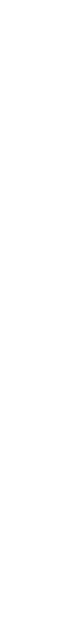

In [188]:
import geopandas as gpd # https://python-graph-gallery.com/map-read-geojson-with-python-geopandas/#:~:text=This%20post%20explains%20how%20to,Geoplot%20as%20shown%20below%20%F0%9F%94%A5!

geodata = gpd.read_file('weekly_vaccination_figures.geojson')

print(type(geodata))

import geoplot
import geoplot.crs as gcrs

geoplot.polyplot(
    geodata,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)

In [189]:
print(geodata.head())  # Check the first few rows of your data

                ExtractDate      Week  TotalweeklyVaccines   Male  Female  NA  \
0 2024-05-12 23:00:00+00:00  2020-W53                 4076   1304    2772   0   
1 2024-05-12 23:00:00+00:00  2021-W01                44220  11846   32374   0   
2 2024-05-12 23:00:00+00:00  2021-W02                53145  14057   39088   0   
3 2024-05-12 23:00:00+00:00  2021-W03                50222  14964   35258   0   
4 2024-05-12 23:00:00+00:00  2021-W04                51949  15066   36883   0   

   Moderna  Pfizer  Janssen  AstraZeneca  ...  FullyPer_Age20to29  \
0       10    4052        0           12  ...                 NaN   
1       28   44148        1           43  ...            0.000018   
2     1946   51118        1           80  ...            0.000032   
3       51   50000        1          169  ...            0.000669   
4       35   51652        1          261  ...            0.007608   

   FullyPer_Age30to39  FullyPer_Age40to49  FullyPer_Age50to59  \
0                 NaN            

## Geographical data

All the data entries in the GeoJson file contained the same data points. This could explain why the graph could not generate.

In [190]:
# https://builtin.com/data-science/train-test-split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('covid_weekly_vaccine.csv')

# Convert 'Date' (or 'Week') to datetime and encode it numerically
df['Date'] = pd.to_datetime(df['Week'] + '-1', format='%G-W%V-%u')
df['Week_Number'] = (df['Date'] - df['Date'].min()).dt.days // 7

# Drop the original 'Date' column
df = df.drop(columns=['Date'])

# Define target and features, target is what we are trying to predict, features are the independant variables that the model will use to make predictions
target = 'TotalweeklyVaccines'
features = [
    'Male', 'Female', 'Moderna', 'Pfizer', 'Janssen', 'AstraZeneca',
    'Partial_Age0to9', 'Partial_Age10to19', 'Partial_Age20to29',
    'Partial_Age30to39', 'Partial_Age40to49', 'Partial_Age50to59',
    'Partial_Age60to69', 'Partial_Age70to79', 'Partial_Age80_',
    'Fully_Age0to9', 'Fully_Age10to19', 'Fully_Age20to29',
    'Fully_Age30to39', 'Fully_Age40to49', 'Fully_Age50to59',
    'Fully_Age60to69', 'Fully_Age70to79', 'Fully_Age80_', 
    'Week_Number' 
]

# Drop rows with any NaN values in features
df = df.dropna(subset=features)

# Split features and target
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using R^2 score
score = model.score(X_test, y_test)
print("R^2 Score:", score)



R^2 Score: 0.9999999995152041


## Machine Learning

R² Score: This score tells you how well your model fits the data. An R² score close to 1 means the model's predictions are extremely accurate.

In [ ]:
# Load the data
df = pd.read_csv('covid_weekly_vaccine.csv')
df2 = pd.read_csv('covid_weekly_booster.csv')

# Merge datasets on the 'Week' column using a left join https://www.w3schools.com/python/pandas/ref_df_merge.asp
merged_df = pd.merge(df, df2, on='Week', how='left')

# Display the combined DataFrame
print(merged_df)

merged_df.to_csv('merged_covid_data.csv', index=False)

               X_x           Y_x           ExtractDate_x      Week  \
0   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2020-W53   
1   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W01   
2   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W02   
3   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W03   
4   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W04   
..             ...           ...                     ...       ...   
170 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W14   
171 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W15   
172 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W16   
173 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W17   
174 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W18   

     TotalweeklyVaccines  Male_x  Female_x  NA_x  Moderna_x  Pfizer_x  ...  \
0                   4076    1304      2772     0         10      4052  ...   
1  

In [192]:
df3 = pd.read_csv('merged_covid_data.csv')

print(df3)


               X_x           Y_x           ExtractDate_x      Week  \
0   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2020-W53   
1   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W01   
2   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W02   
3   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W03   
4   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W04   
..             ...           ...                     ...       ...   
170 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W14   
171 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W15   
172 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W16   
173 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W17   
174 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W18   

     TotalweeklyVaccines  Male_x  Female_x  NA_x  Moderna_x  Pfizer_x  ...  \
0                   4076    1304      2772     0         10      4052  ...   
1  

In [193]:
# Convert the 'week' column to a proper date (first day of the ISO week)
df3['Date'] = pd.to_datetime(df3['Week'] + '-1', format='%G-W%V-%u')

# Check the first few rows
df3[['Week', 'Date']].head()

,Week,Date
0,2020-W53,2020-12-28
1,2021-W01,2021-01-04
2,2021-W02,2021-01-11
3,2021-W03,2021-01-18
4,2021-W04,2021-01-25


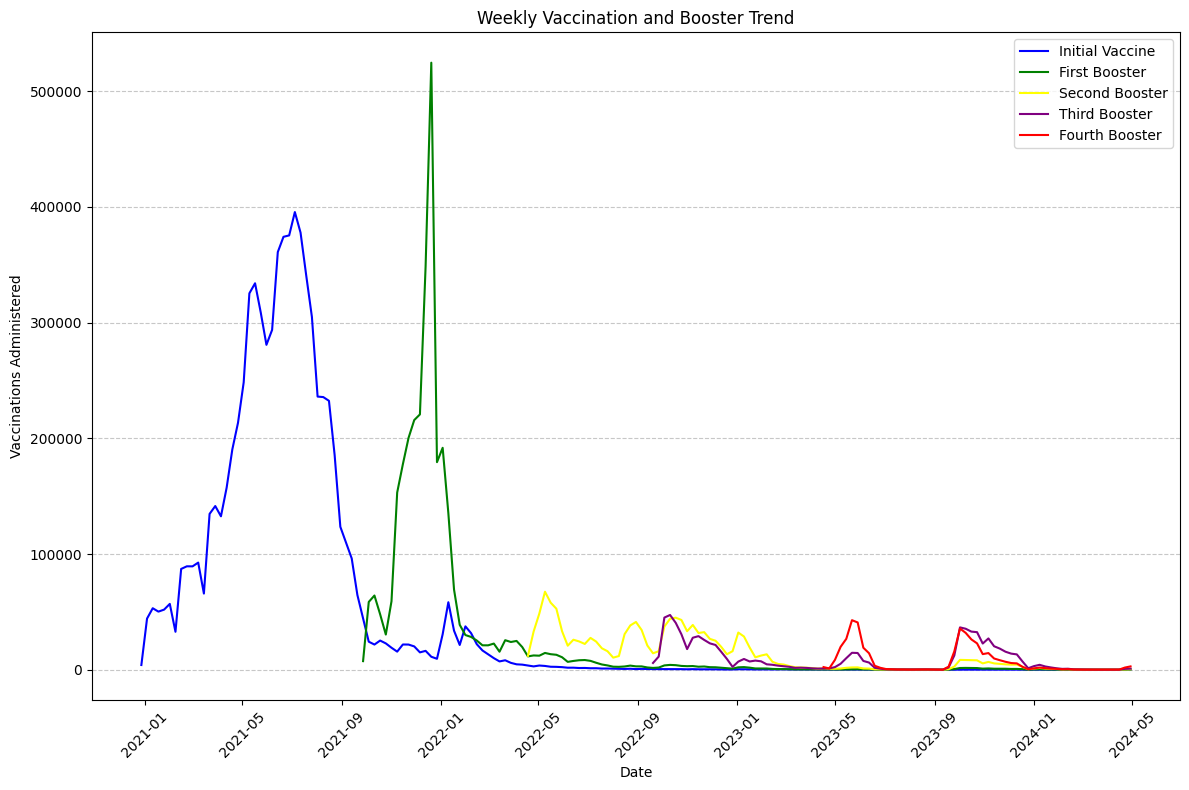

In [194]:
# Create a plot with both vaccination and booster data
plt.figure(figsize=(12, 8))

# Plot Total Vaccines
plt.plot(df3['Date'], df3['TotalweeklyVaccines'], label='Initial Vaccine', color='blue')

# Plot Booster Vaccines
plt.plot(df3['Date'], df3['WeeklyBoosterVaccines'], label='First Booster', color='green')

plt.plot(df3['Date'], df3['WeeklyAdditionalDose2'], label='Second Booster', color='yellow')

plt.plot(df3['Date'], df3['WeeklyAdditionalDose3'], label='Third Booster', color='purple')

plt.plot(df3['Date'], df3['WeeklyAdditionalDose4'], label='Fourth Booster', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination and Booster Trend')

# Formatting the x-axis for better visibility
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Comparison of Weekly Booster Rates with Initial Vaccine Rates

- **Initial Vaccine Rate:**
  - **Peak:** Over 400,000 vaccinations per week during the early vaccination rollout (2021).
  - **Insight:** The initial vaccine rate was driven by mass vaccination campaigns and the urgency to vaccinate as many people as possible to control the spread of COVID-19. This involved vaccinating large groups, especially high-risk populations, which contributed to the high rate.

- **Booster Rates:**
  - **First Booster Rate:** Peaked at over 500,000 vaccinations per week, which was higher than the initial vaccine peak.
  - **Insight:** The first booster dose saw a higher peak than the initial vaccinations. This could be because, by the time the booster shots were rolled out, a larger portion of the population had already been vaccinated, making the number of eligible individuals for the booster significantly larger.
  
- **Overall Comparison:**
  - **Higher Weekly Rate for Booster:** Despite the higher peak in the first booster rate, **more people received the first vaccine** in total compared to the boosters.
  - **Reasoning:** The initial vaccine rate involved vaccinating a large portion of the population, including those with no prior immunity. In contrast, the booster doses targeted a smaller subset of the population (those who were already vaccinated) and thus saw lower overall numbers. 
    - The first vaccine doses were crucial for achieving broad population immunity, which explains the higher overall numbers.
    - The higher weekly rate for the first booster suggests a strong response initially, as many individuals returned for their boosters. However, the uptake slowed for subsequent boosters, as mentioned earlier, due to factors like vaccine fatigue, perception of sufficient immunity, and evolving vaccine policies.

- **Second, Third, and Fourth Booster Rates:**
  - **Second Booster Rate:** Just over 50,000 vaccinations per week.
  - **Third Booster Rate:** Under 50,000 vaccinations per week.
  - **Fourth Booster Rate:** Lower than the third booster rate, under 50,000 vaccinations per week.
  - **Insight:** The lower uptake for the second, third, and fourth boosters can be attributed to several factors:
    - **Diminishing Returns:** As the population got vaccinated initially, the remaining eligible individuals were more likely to be hesitant or less urgent about receiving subsequent doses.
    - **Vaccine Fatigue:** People may have experienced booster fatigue after multiple doses, resulting in reduced enthusiasm for additional boosters.
    - **Perceived Immunity:** With widespread vaccination, some individuals may have felt sufficiently protected after the initial doses and the first booster, leading to reluctance for further boosters.
    - **Eligibility Delays:** For later boosters, the eligibility might have been based on a certain time after the previous doses, resulting in a smaller window for those to receive them.
    - **Global Vaccine Supply & Policy:** Limited access or different vaccine availability could have played a role, especially in areas with lower vaccine availability.

Overall, the decline in vaccination rates for subsequent boosters indicates a trend of diminishing demand as the initial wave of vaccination reached its peak and additional doses became less prioritized by the public.